# Who Listens to What? An Exploratory Analysis of Music Preferences

In the world of music streaming, data tells a story. This project dives into a dataset of music listening habits from two cities, Springfield and Shelbyville, to uncover the hidden narratives within their playlists. The primary goal is to perform a comprehensive analysis to understand, compare, and contrast the musical preferences of their residents.

We will answer key questions such as:

- What are the most popular genres in each city?

- Do listening habits change on different days of the week?

- How do the overall music tastes of the two cities truly differ?

This notebook will walk through the entire data analysis process, starting with crucial data cleaning and preprocessing, moving into exploratory data analysis (EDA) with visualizations, and finally, performing hypothesis testing to validate our observations.

**Tools Used**: Python, Pandas, Matplotlib, and Seaborn.

## Step 1: Initial Data Inspection

Before we do anything else, it's important to load and inspect the data to get a clear picture of what we're working with. This helps us confirm column names, find potential issues, and understand the data types.

In [1]:
# Load and inspect the dataset
import pandas as pd

# Load the CSV file
df = pd.read_csv('data/music_project_en (1).csv')

# Display the first few rows
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday


In [2]:
# Check for leading/trailing spaces in column names
print('Column names:', list(df.columns))

# Check for missing values in each column
print('\nMissing values per column:')
print(df[['Track', 'artist', 'genre']].isnull().sum())

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f'\nNumber of duplicate rows: {num_duplicates}')

# Check data types and non-null counts
print('\nDataFrame info:')
df.info()

Column names: ['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day']

Missing values per column:
Track     1343
artist    7567
genre     1198
dtype: int64

Number of duplicate rows: 3826

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


### Data Inspection Findings
The initial look at the data gives us critical information:

- **Column Names:** There are leading/trailing spaces in some column names (e.g., `'  userID'`, `'  City  '`). This is a common issue and needs to be fixed to avoid errors.
- **Missing Values:** We have missing values in the `Track`, `artist`, and `genre` columns. We need a strategy to handle these. Simply dropping them might remove too much data, so we'll have to be smart about it.
- **Duplicates:** There are 3,826 duplicate rows. These should be removed to ensure our analysis is accurate.
- **Data Types:** All columns are currently of the object type. While this is fine for most, the `time` column should ideally be a datetime object if we want to do time-based analysis.

## Step 2: Data Cleaning and Preprocessing
Let's write the code to fix these issues.



In [4]:
# --- Data Cleaning and Preprocessing ---
# 1. Standardize column names (strip spaces, lowercase, rename for clarity)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.rename(columns={'userid': 'user_id'})  # if needed, for clarity

# 2. Handle missing values in Track, artist, and genre by replacing with 'unknown'
df['track'] = df['track'].fillna('unknown')
df['artist'] = df['artist'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

# 3. Remove duplicate rows
df = df.drop_duplicates()

# 4. Fix inconsistent genre names (merge 'hip', 'hop', 'hip-hop' into 'hiphop')
df['genre'] = df['genre'].str.strip().str.lower().replace({'hip': 'hiphop', 'hop': 'hiphop', 'hip-hop': 'hiphop'})

# 5. Save cleaned data to a new CSV file
df.to_csv('music_data_cleaned.csv', index=False)

# Show a preview of the cleaned data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61253 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  61253 non-null  object
 1   track    61253 non-null  object
 2   artist   61253 non-null  object
 3   genre    61253 non-null  object
 4   city     61253 non-null  object
 5   time     61253 non-null  object
 6   day      61253 non-null  object
dtypes: object(7)
memory usage: 3.7+ MB


We have now performed the crucial data cleaning and preprocessing stage. Our data is much more reliable for analysis. 

**Here's a summary of what we've accomplished:**

- Standardized column names (e.g., '  City  ' is now 'city').

- Handled missing values by replacing them with 'unknown', preserving our data.

- Removed over 3,800 duplicate rows.

- Fixed inconsistent genre names, like merging 'hip', 'hop', and 'hip-hop' into a single 'hiphop' category.

## Step 3: Exploratory Data Analysis (EDA)

Now for the fun part: exploring the data to find stories. We'll analyze the music preferences in Springfield and Shelbyville. Let's start by comparing the overall listening counts and then dive into the genre preferences. Beautiful and clear graphics will help us visualize the differences.

C:\Users\apicn\AppData\Local\Temp\ipykernel_74604\3417280482.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='crest')


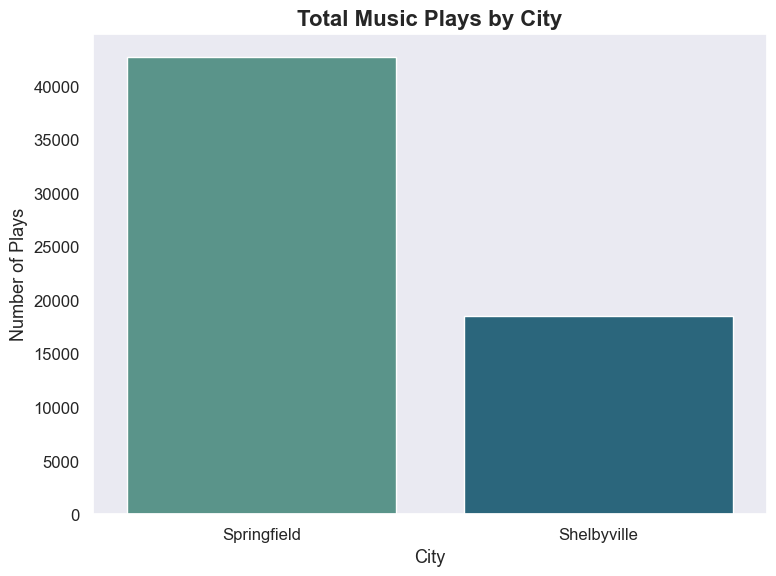

C:\Users\apicn\AppData\Local\Temp\ipykernel_74604\3417280482.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\apicn\AppData\Local\Temp\ipykernel_74604\3417280482.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


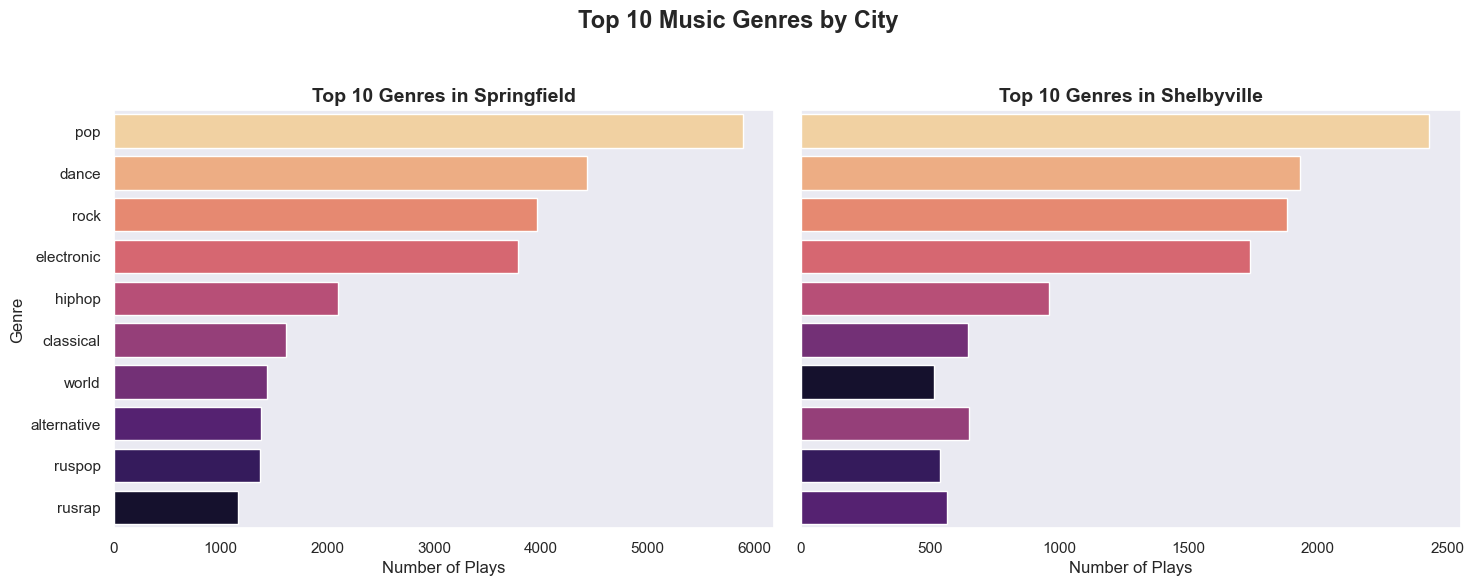

In [6]:
# --- Improved EDA Visualizations: Top Genres by City and Total Plays ---
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
eda_df = pd.read_csv('music_data_cleaned.csv')

sns.set(style='dark', palette='colorblind', font_scale=1.2)

# 1. Total music plays by city
plt.figure(figsize=(8, 6))
city_counts = eda_df['city'].value_counts().sort_values(ascending=False)
sns.barplot(x=city_counts.index, y=city_counts.values, palette='crest')
plt.title('Total Music Plays by City', fontsize=16, weight='bold')
plt.xlabel('City', fontsize=13)
plt.ylabel('Number of Plays', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 2. Top 10 genres in each city (side-by-side bar charts)
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
for i, city in enumerate(['springfield', 'shelbyville']):
    top_genres = (
        eda_df[eda_df['city'].str.lower() == city]
        .groupby('genre').size().sort_values(ascending=False).head(10)
    )
    sns.barplot(
        x=top_genres.values,
        y=top_genres.index,
        ax=axes[i],
        palette='magma_r'
    )
    axes[i].set_title(f'Top 10 Genres in {city.capitalize()}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Number of Plays', fontsize=12)
    axes[i].set_ylabel('Genre', fontsize=12)
    axes[i].tick_params(axis='y', labelsize=11)
    axes[i].tick_params(axis='x', labelsize=11)
plt.suptitle('Top 10 Music Genres by City', fontsize=17, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Analysis of City Music Tastes
These visualizations give us our first real insight!

- Overall Activity: As we can see in the first chart, Springfield has more than double the number of music plays compared to Shelbyville. This is an important piece of context.

- Genre Preferences: The side-by-side bar charts reveal interesting patterns and similarities:

- Common Ground: Both cities have the exact same top 4 genres: Pop, Dance, Rock, and Electronic. Pop music is the undisputed king in both Springfield and Shelbyville.

- Springfield's Favorites: After the top 4, Springfield shows a strong preference for Classical music and World music.

- Shelbyville's Vibe: In Shelbyville, Alternative music ranks higher than it does in Springfield.